In [1]:
from fastai.vision.all import *
from fastai.vision.models import vgg16_bn
import glob

In [2]:
torch.cuda.is_available()

True

In [14]:
path_data = 'study-one-data'
len(glob.glob1(path_data+'/monkeypox',"*.jpg")), len(glob.glob1(path_data+'/chickenpox',"*.jpg"))

(43, 47)

In [4]:
#    
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=39),
    get_y=parent_label,
    item_tfms=[Resize(128, method='squish')], 
    batch_tfms=aug_transforms(mult=1, max_rotate = 45, max_zoom=1.02)
)

dls = data.dataloaders(path_data, batch_size=16)

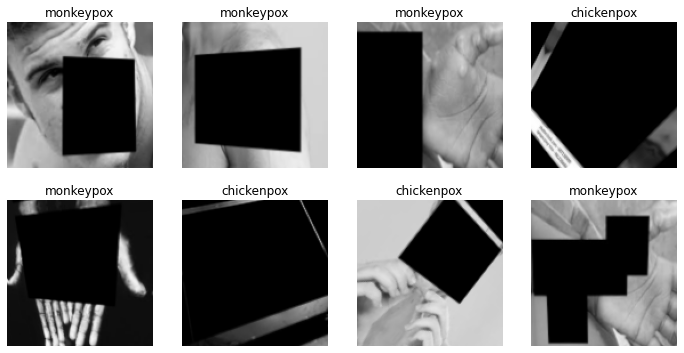

In [7]:
dls.train.show_batch(max_n=8, nrows=2)

/mnt/irisgpfs/users/cvega/jupyter_env/lib/python3.8/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/mnt/irisgpfs/users/cvega/jupyter_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/mnt/irisgpfs/users/cvega/jupyter_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.688319,0.671239,0.388889,00:01


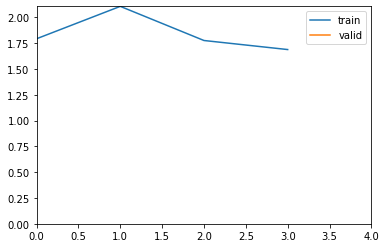

epoch,train_loss,valid_loss,error_rate,time
0,0.747848,0.760798,0.500000,00:01
1,0.798615,0.787881,0.444444,00:01
2,0.756850,0.724197,0.388889,00:01
3,0.700135,0.665362,0.333333,00:01
4,0.662594,0.628831,0.333333,00:01
5,0.626409,0.560304,0.166667,00:01
6,0.600166,0.462887,0.166667,00:01
7,0.553254,0.379203,0.166667,00:01
8,0.506167,0.300030,0.166667,00:01
9,0.493010,0.279661,0.166667,00:01


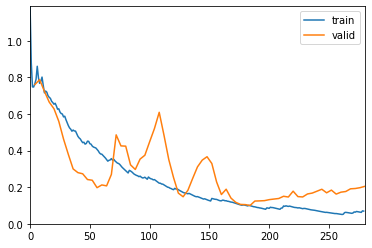

In [11]:
model = cnn_learner(dls, vgg16_bn, metrics=error_rate, lr=0.001)
model.fine_tune(70, cbs=[ShowGraphCallback()])

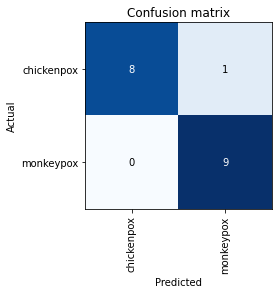

In [12]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [13]:
interp.print_classification_report()

              precision    recall  f1-score   support

  chickenpox       1.00      0.89      0.94         9
   monkeypox       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18

